In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50 

In [4]:
#Dataset loaded to tensorflow pipeline
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 2153 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 1 1 1 2 0 1 0 2 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0]


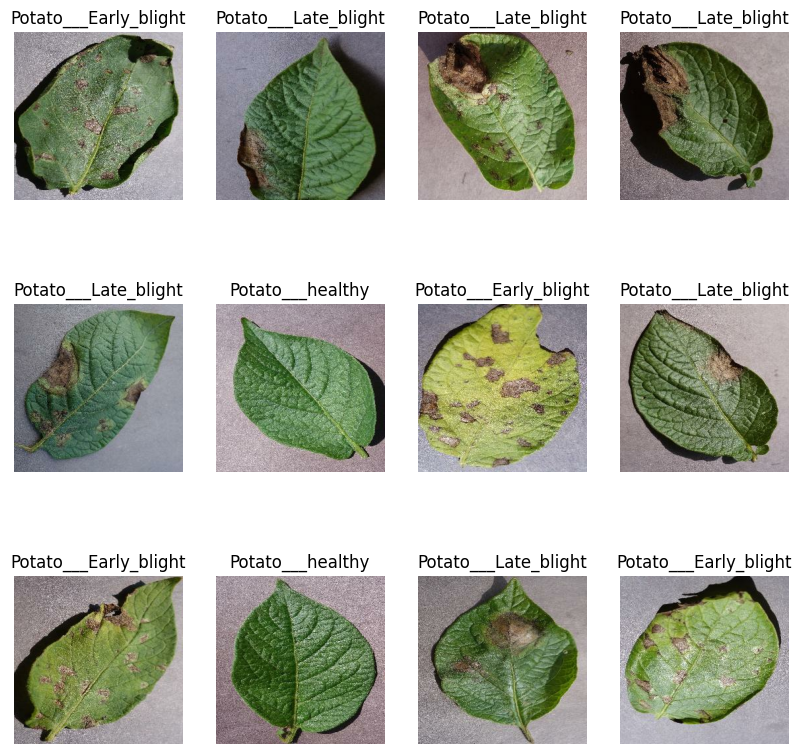

In [6]:
#this code is visualizing the first batch of images from a dataset. 
#It prints information about the shape and labels of the batch and displays
# the first 12 images in a 3x4 grid using Matplotlib.
plt.figure(figsize=(10,10))
for image_batch , labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]]) 
        plt.axis("off")

In [7]:
#Train Test Split 80%training, 10% test , 10% validation
train_size=0.8
len(dataset) *train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54) #.take() is used for new dataset creation
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=1000):
    assert(train_split+test_split+val_split) == 1
    ds_size= len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds , test_ds

In [14]:
train_ds, val_ds , test_ds=get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(test_ds)

8

In [17]:
len(val_ds)

6

In [18]:

#this code is preparing a TensorFlow dataset (train_ds) for training a machine
# learning model by caching the data, shuffling it with a buffer size of 1000,
# and prefetching batches with a 
#buffer size automatically tuned by TensorFlow based on system resources. 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds  =  train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
#Image in Numpy Form
for image_batch , labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.46666667 0.45490196 0.49803922]
  [0.5411765  0.5294118  0.57254905]
  [0.4        0.3882353  0.43137255]
  ...
  [0.6117647  0.6        0.6431373 ]
  [0.5921569  0.5803922  0.62352943]
  [0.57254905 0.56078434 0.6039216 ]]

 [[0.36862746 0.35686275 0.4       ]
  [0.6392157  0.627451   0.67058825]
  [0.4627451  0.4509804  0.49411765]
  ...
  [0.6039216  0.5921569  0.63529414]
  [0.59607846 0.58431375 0.627451  ]
  [0.59607846 0.58431375 0.627451  ]]

 [[0.3882353  0.3764706  0.41960785]
  [0.5529412  0.5411765  0.58431375]
  [0.5176471  0.5058824  0.54901963]
  ...
  [0.57254905 0.56078434 0.6039216 ]
  [0.5764706  0.5647059  0.60784316]
  [0.5882353  0.5764706  0.61960787]]

 ...

 [[0.6431373  0.63529414 0.6784314 ]
  [0.57254905 0.5647059  0.60784316]
  [0.42745098 0.41960785 0.4627451 ]
  ...
  [0.7176471  0.7137255  0.74509805]
  [0.7019608  0.69803923 0.7294118 ]
  [0.65882355 0.654902   0.6862745 ]]

 [[0.6156863  0.60784316 0.6509804 ]
  [0.6745098  0.6666667  0.70980394]


In [20]:
#Normalisation
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
#DATA AUGMENTATION
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 121s 2s/step - loss: 1.7250 - accuracy: 0.5336 - val_loss: 0.7648 - val_accuracy: 0.7228
Epoch 2/50
54/54 [==============================] - 112s 2s/step - loss: 0.5998 - accuracy: 0.7662 - val_loss: 0.3934 - val_accuracy: 0.8374
Epoch 3/50
54/54 [==============================] - 101s 2s/step - loss: 0.2815 - accuracy: 0.8837 - val_loss: 0.1908 - val_accuracy: 0.9190
Epoch 4/50
54/54 [==============================] - 106s 2s/step - loss: 0.2671 - accuracy: 0.8814 - val_loss: 0.2800 - val_accuracy: 0.8866
Epoch 5/50
54/54 [==============================] - 116s 2s/step - loss: 0.2340 - accuracy: 0.9091 - val_loss: 0.2769 - val_accuracy: 0.8866
Epoch 6/50
54/54 [==============================] - 121s 2s/step - loss: 0.2320 - accuracy: 0.9132 - val_loss: 0.2598 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 112s 2s/step - loss: 0.1772 - accuracy: 0.9294 - val_loss: 0.1672 - val_accuracy: 0.9311
Epoch 8/50
54

In [26]:
scores= model.evaluate(test_ds)

54/54 [==============================] - 23s 421ms/step - loss: 0.0411 - accuracy: 0.9861


In [27]:
scores

[0.04107889533042908, 0.9861111044883728]

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.7250052690505981,
 0.5997859239578247,
 0.2815059423446655,
 0.2670844495296478,
 0.23398694396018982]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

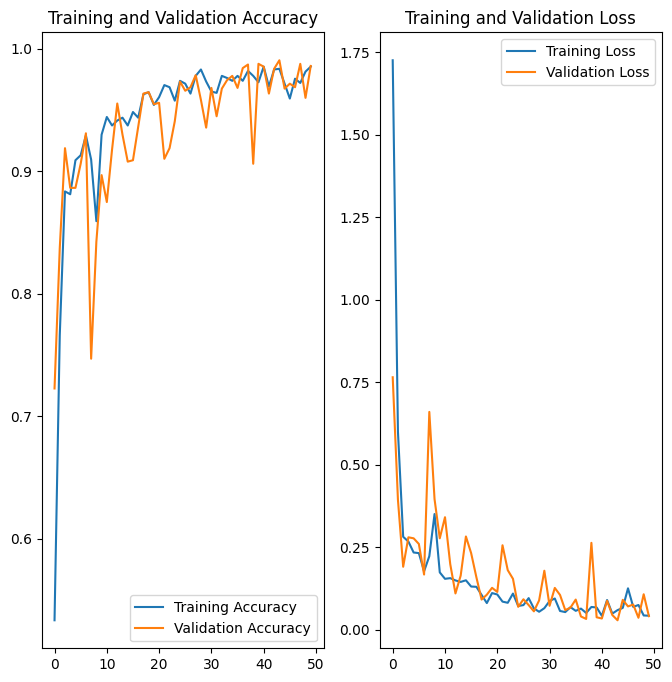

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run Prediction on a Sample Image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 297ms/step
predicted label: Potato___Late_blight


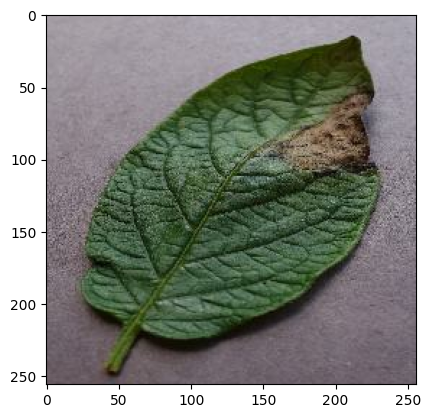

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Inference Function

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


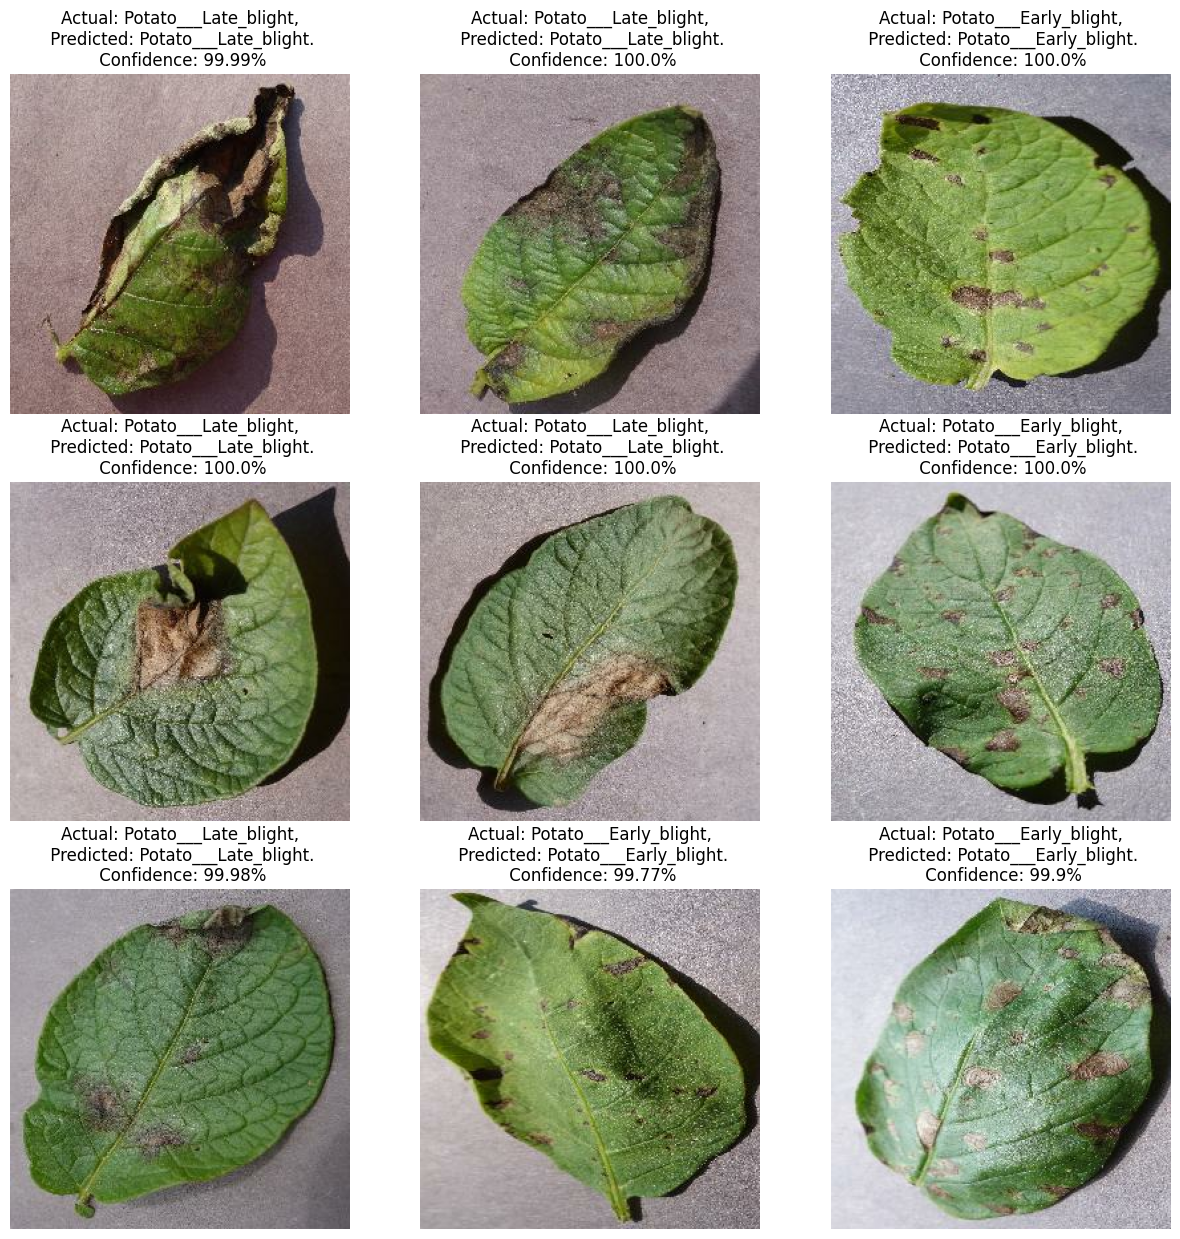

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [40]:
model.save("../potatoes.h5")

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
